In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

In [6]:
   # Age: age in years
   # Gender: gender (1 = male; 0 = female)
    #Cp: chest pain type
    #Value 1: typical angina
    #Value 2: atypical angina
    #Value 3: non-anginal pain
    #Value 0: asymptomatic
    #Trtbps: resting blood pressure (in mm Hg on admission to the hospital)
    #Chol: serum cholesterol in mg/dl
    #Fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
    #Restecg: resting electrocardiographic results
    #Value 0: normal
    #Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 005 mV)
    #Value 2: showing probable or definite left ventricular hypertropy by Estes criteria
    #Thalach: maximum heart rate achieved in beats per minute (bpm)
    #Exang: exercise induced angina (1 = yes; 0 = no)
    #Oldpeak: ST depression induced by exercise relative to rest
    #Slope: the slope of the peak exercise ST segment
    #Value 1: upsloping
    #Value 2: flat
    #Value 3: down-sloping
    #Ca: number of major vessels (0-3) colored by fluoroscopy
    #Thal: 3 = normal; 6 = fixed defect; 7 = reversible defect
    #The target feature has two classes and hence it is a binary classification problem. To reiterate, the goal is to predict whether a person has heart disease.
     #0= less chance of heart attack 1= more chance of heart 


In [7]:
df = pd.read_csv("C:/Users/hp/Desktop/heart/heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trtbps      303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalachh    303 non-null int64
exng        303 non-null int64
oldpeak     303 non-null float64
slp         303 non-null int64
caa         303 non-null int64
thall       303 non-null int64
output      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [9]:
#number of records and features in the dataset
df.shape

(303, 14)

In [10]:
# Checking For Duplicates

In [14]:
duplicate_rows = df[df.duplicated()]
print('Number of duplicate rows ::', duplicate_rows.shape)
duplicate_rows

Number of duplicate rows :: (0, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output


In [15]:
# Cross-checking FOr Duplicates After Dropping

In [16]:
df = df.drop_duplicates()
duplictate_rows = df[df.duplicated()]
print('Number of duplicate rows ::', duplicate_rows.shape)


Number of duplicate rows :: (0, 14)


In [17]:
#Checking For Null Values

In [18]:
df.isnull().sum   

<bound method DataFrame.sum of        age    sex     cp  trtbps   chol    fbs  restecg  thalachh   exng  \
0    False  False  False   False  False  False    False     False  False   
1    False  False  False   False  False  False    False     False  False   
2    False  False  False   False  False  False    False     False  False   
3    False  False  False   False  False  False    False     False  False   
4    False  False  False   False  False  False    False     False  False   
5    False  False  False   False  False  False    False     False  False   
6    False  False  False   False  False  False    False     False  False   
7    False  False  False   False  False  False    False     False  False   
8    False  False  False   False  False  False    False     False  False   
9    False  False  False   False  False  False    False     False  False   
10   False  False  False   False  False  False    False     False  False   
11   False  False  False   False  False  False    False  

In [19]:
df.shape # Checking If the Data is Consistent

(302, 14)

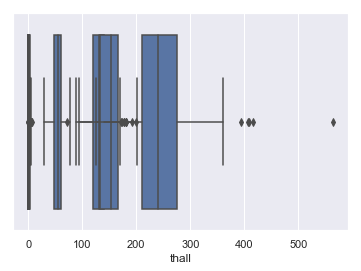

In [20]:
#As there are no null values in data, we can proceed with the next steps.
#Detecting Outliers
# 1. Detecting Outliers using IQR (InterQuartile Range)
sns.boxplot(x=df['age'])
#No Outliers observed in 'age'
sns.boxplot(x=df['sex'])
#No outliers observed in sex data
sns.boxplot(x=df['cp'])
#No outliers in 'cp'
sns.boxplot(x=df['trtbps'])
#Some outliers are observed in 'trtbps'. They will be removed later
sns.boxplot(x=df['chol'])
#Some outliers are observed in 'chol'. They will be removed later
sns.boxplot(x=df['fbs'])
sns.boxplot(x=df['restecg'])
sns.boxplot(x=df['thalachh'])
#Outliers present in thalachh
sns.boxplot(x=df['exng'])
sns.boxplot(x=df['oldpeak'])
#Outliers are present in 'OldPeak'
sns.boxplot(x=df['slp'])
sns.boxplot(x=df['caa'])
#Outliers are present in 'caa'
sns.boxplot(x=df['thall'])

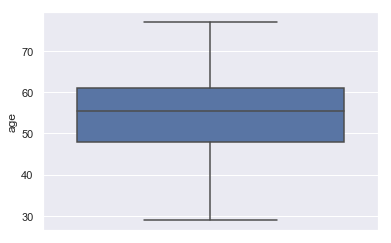

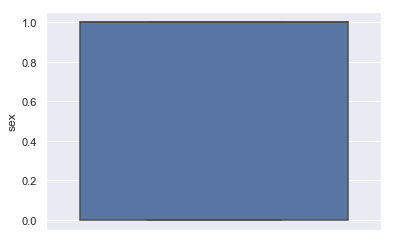

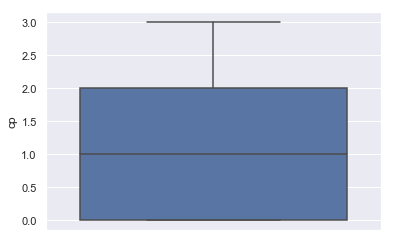

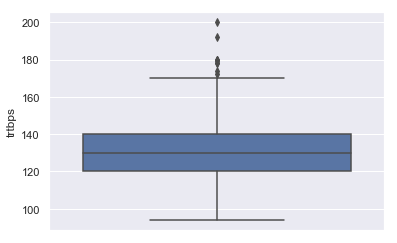

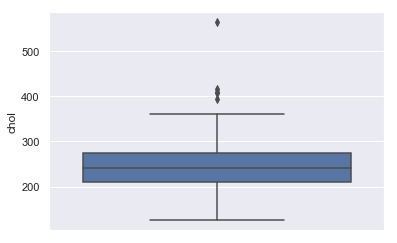

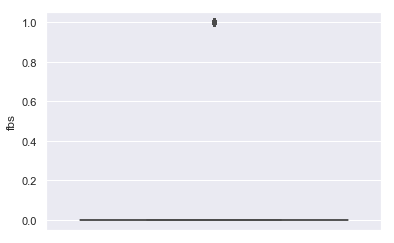

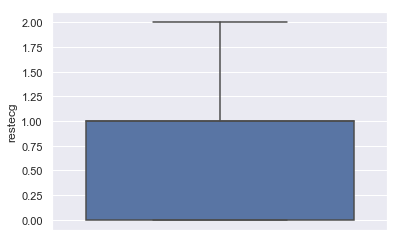

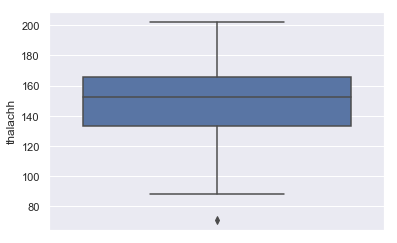

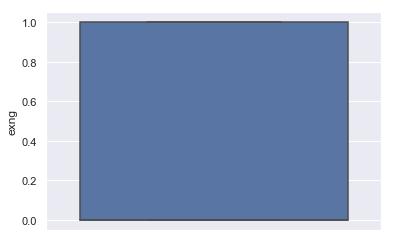

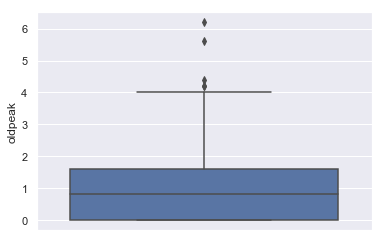

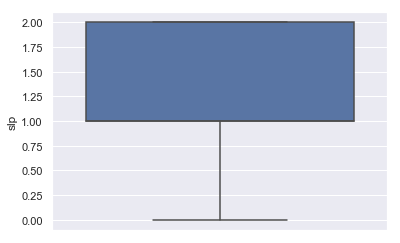

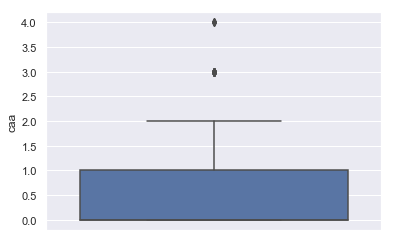

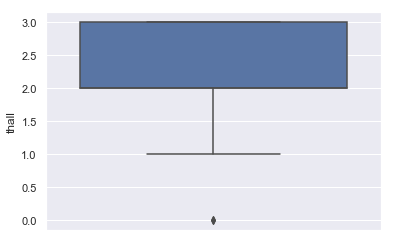

In [21]:
for i in range(0,13):
    sns.boxplot(y=df.iloc[:,i],data=df)
    plt.show()

In [22]:
# Univariate Analysis

In [23]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


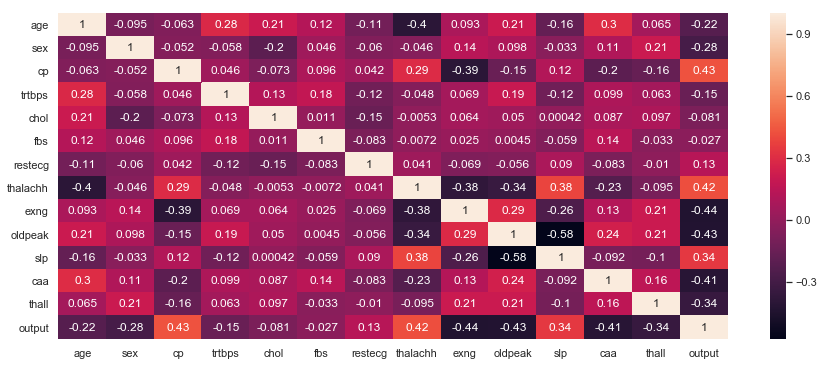

In [24]:
plt.figure(figsize= (15,6))
sns.set_style("dark")
sns.heatmap(df.corr(),annot= True)
plt.show()

In [25]:
df.output.mean()*100

54.3046357615894

In [26]:
#Output vs Age

[Text(0.5, 1.0, 'Age as per dataset ')]

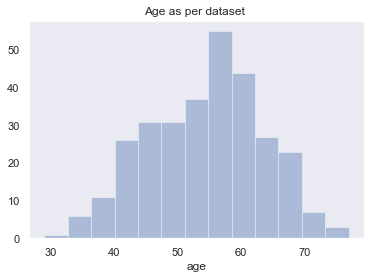

In [27]:
sns.distplot(df['age'],kde = False).set(title="Age as per dataset ")

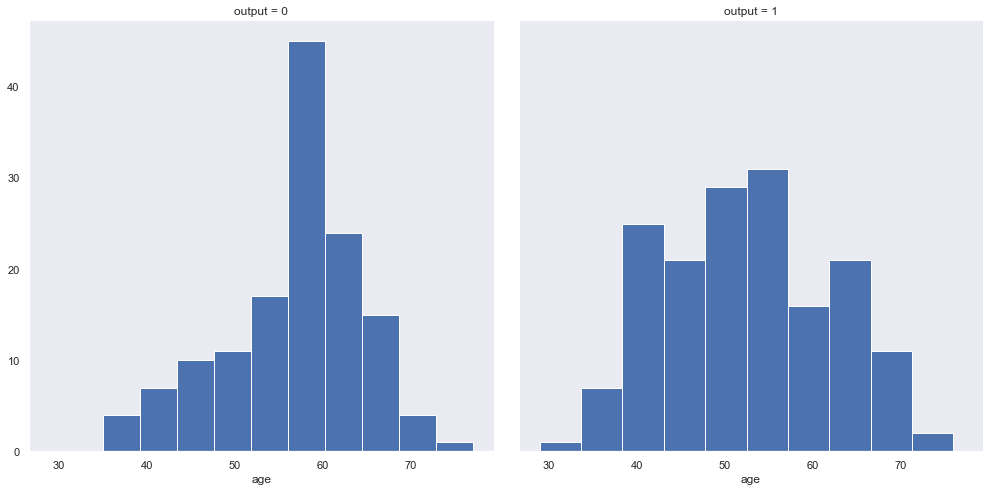

In [28]:
sns.FacetGrid(df,col='output',height=7).map(plt.hist,'age')

In [29]:
#It seems like people below the age of 57 are less prone to heart attack and people betwween the age of 55-60 are prone to have heart attack. This information may be ambiguous therefore we might go for multivariate anaysis or if it has outliers we might remove that as well.

In [30]:
#Output vs Sex

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


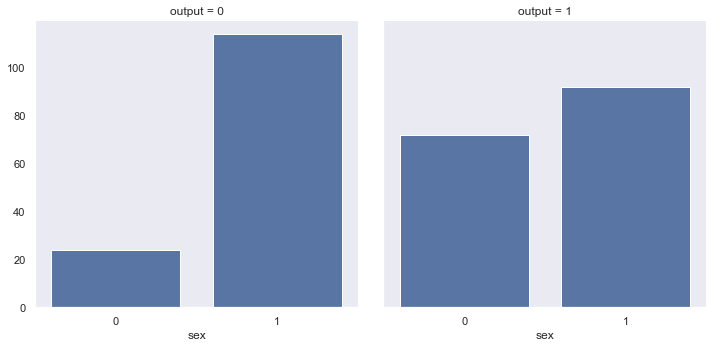

In [31]:
sns.FacetGrid(df,col='output',height=5).map(sns.countplot,'sex').add_legend()

In [32]:
#Significantly higher proportion of males were diagnosed with cardiac disease compared to females.

In [33]:
#Output vs Chest Pain type(cp)
 #   chest pain type
 #0: typical angina
 #1: atypical angina
 #2: non-anginal pain
 #3: asymptomatic

Text(0.5, 1.0, 'Chest pain type')

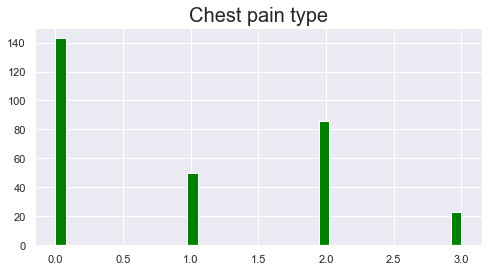

In [34]:
df['cp'].hist(color='green',bins=40,figsize=(8,4))
plt.title("Chest pain type",fontsize=20)

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


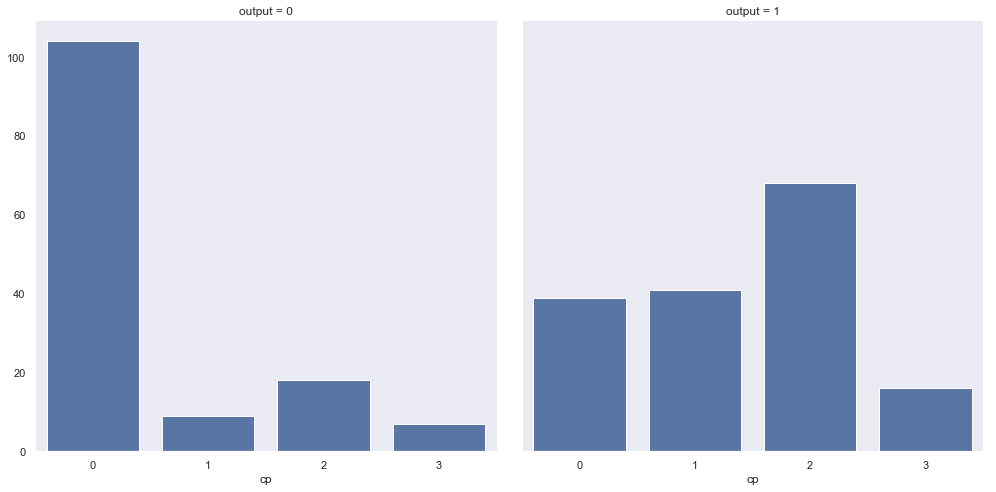

In [35]:
sns.FacetGrid(df,col='output',height=7).map(sns.countplot,'cp') 

In [36]:
#Output vs Resting blood pressure (in mm Hg on admission to the hospital)

[Text(0.5, 1.0, 'output vs trtbps')]

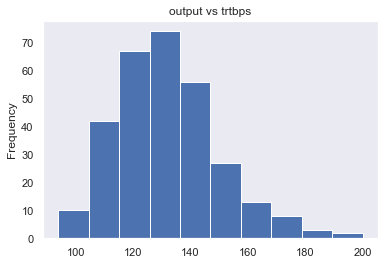

In [37]:
df.trtbps.plot.hist().set(title='output vs trtbps' )

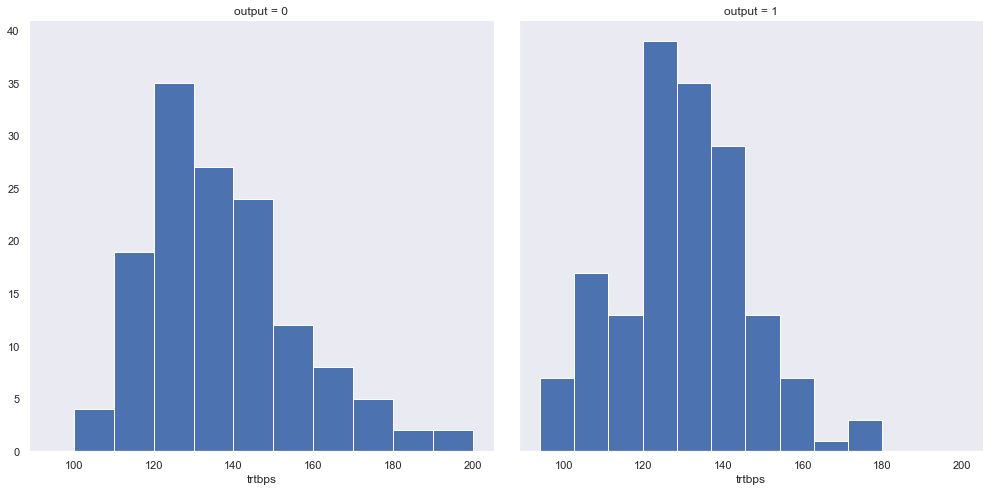

In [38]:
sns.FacetGrid(df,col='output',height=7).map(plt.hist,'trtbps')

In [39]:
#Output vs cholestrol

(array([ 12.,  72., 106.,  69.,  35.,   3.,   4.,   0.,   0.,   1.]),
 array([126. , 169.8, 213.6, 257.4, 301.2, 345. , 388.8, 432.6, 476.4,
        520.2, 564. ]),
 <a list of 10 Patch objects>)

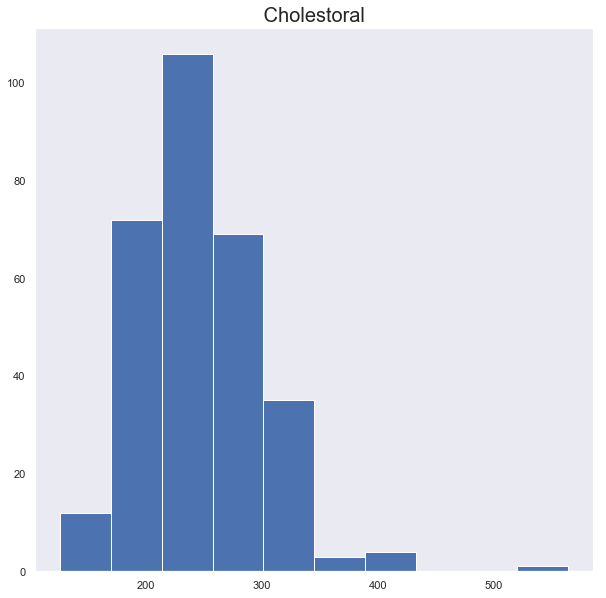

In [40]:
plt.figure(figsize=(10,10))
plt.title(" Cholestoral ",fontsize=20)
plt.hist(x='chol',data=df)   

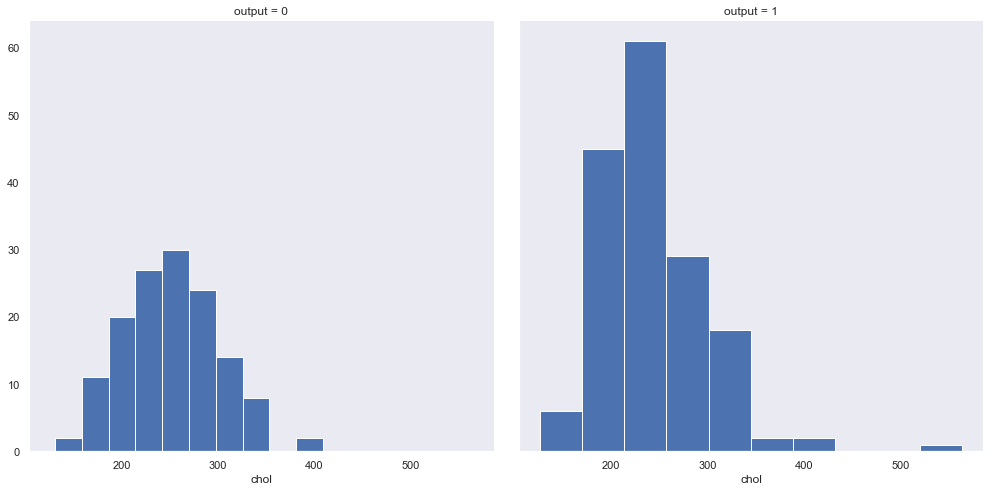

In [41]:
sns.FacetGrid(df,col='output',height=7).map(plt.hist,'chol')

In [42]:
#Output vs Fasting Blood Sugar Fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)<\p>

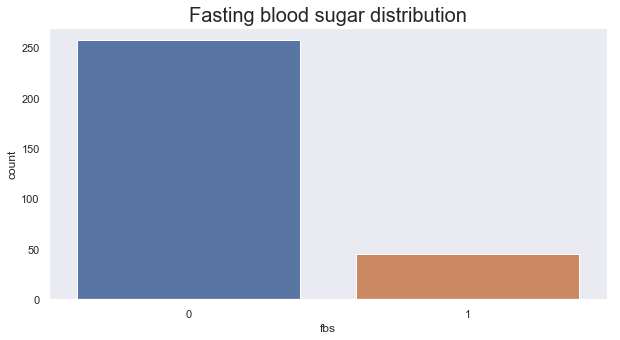

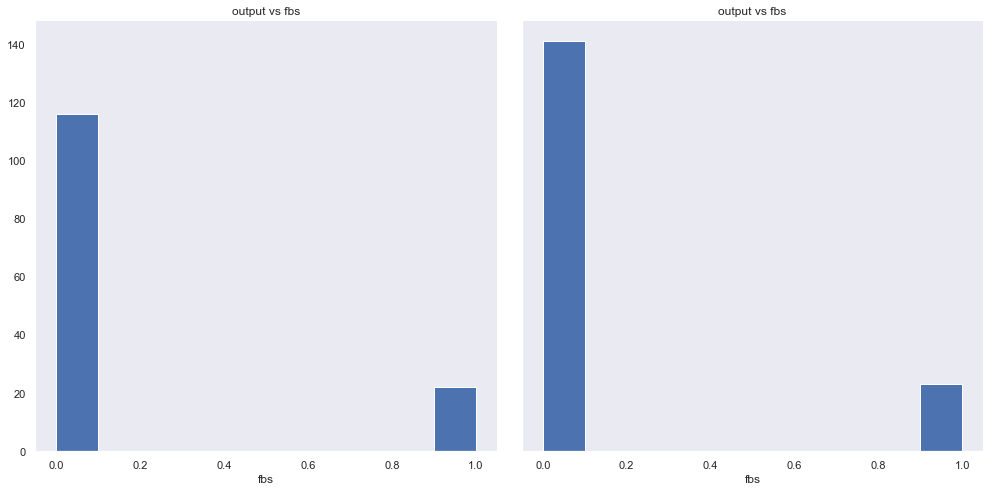

In [43]:
plt.figure(figsize=(10,5))
plt.title("Fasting blood sugar distribution",fontsize=20)
sns.countplot(df['fbs'])
sns.FacetGrid(df,col='output',height=7).map(plt.hist,'fbs').set(title="output vs fbs")

In [44]:
#Most individuals did not have fasting blood sugar levels greater than 120 mg/dL . This did not change greatly when the data was divided based on the presence of disease although a slightly higher proportion of diseased patients exhibited higher levels of blood sugar.

In [45]:
# Output vs Resting Electrocardiographic results
#   Value 0: normal
#   Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 005 mV)
#   Value 2: showing probable or definite left ventricular hypertropy by Estes criteria

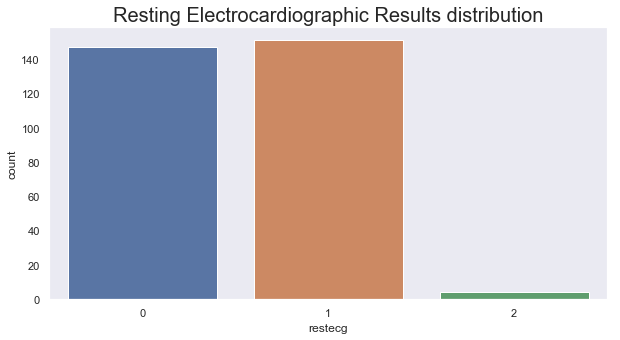

Output vs Resting Electrocardiographic result


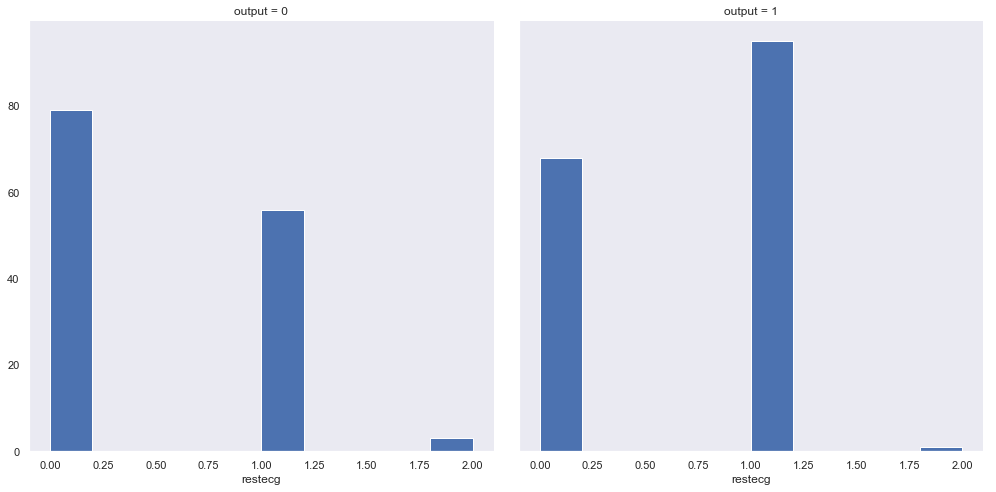

In [46]:
plt.figure(figsize=(10,5))
plt.title("Resting Electrocardiographic Results distribution",fontsize=20)
sns.countplot(df['restecg'])
plt.show()
print("Output vs Resting Electrocardiographic result")
sns.FacetGrid(df,col='output',height=7).map(plt.hist,'restecg')

In [47]:
#People showing probable or definite left ventricular hypertropy by Estes criteria have less chanes to end up with heart attack.

In [48]:
#Output vs Thalachh(maximum heart rate achieved in beats per minute (bpm))

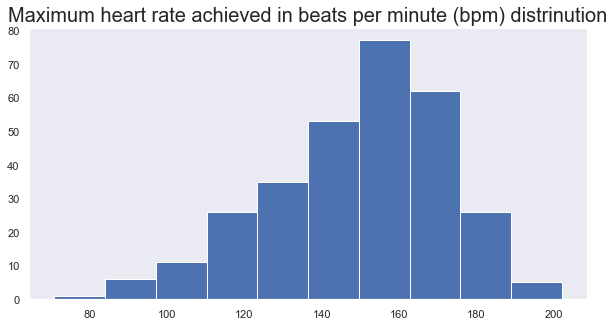

Output vs Thalachh 


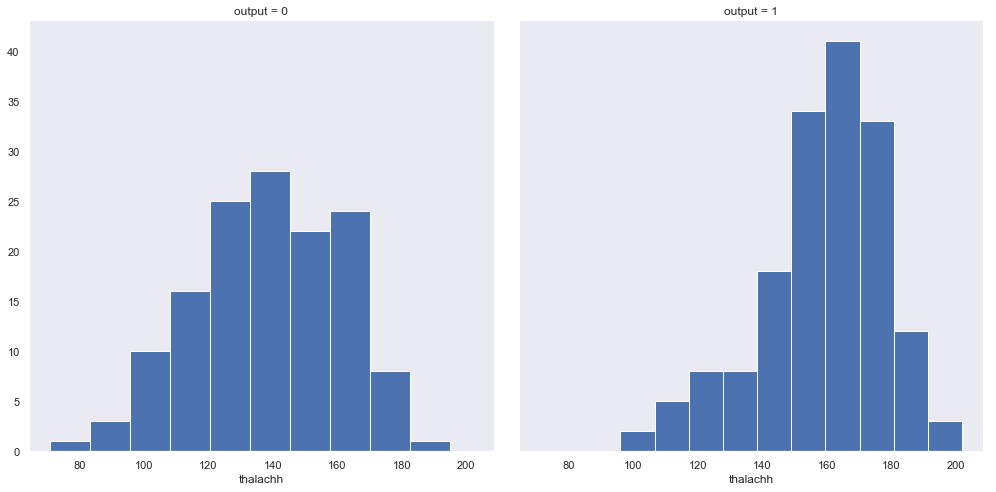

In [52]:
plt.figure(figsize=(10,5))
plt.title("Maximum heart rate achieved in beats per minute (bpm) distrinution",fontsize=20)
plt.hist(df['thalachh'])
plt.show()
print("Output vs Thalachh ")
sns.FacetGrid(df,col='output',height=7).map(plt.hist,'thalachh')   

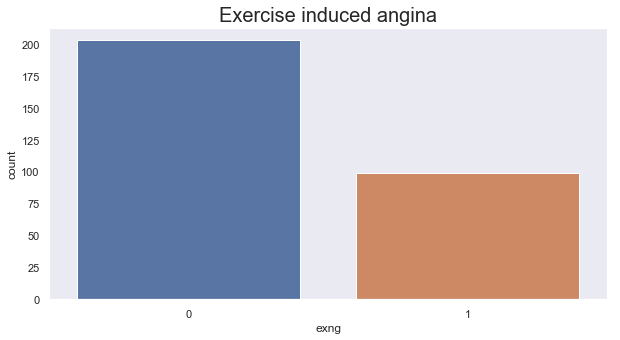

Output vs exchng 


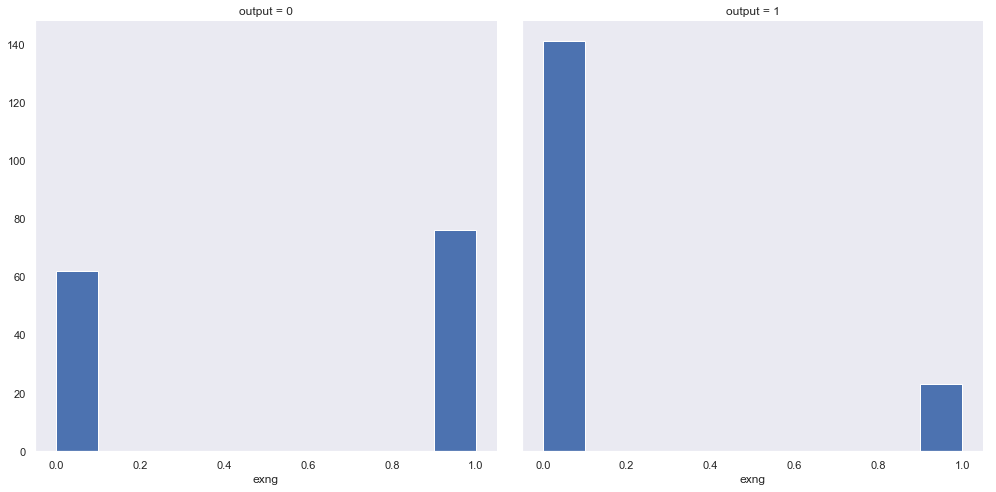

In [50]:
plt.figure(figsize=(10,5))
plt.title("Exercise induced angina",fontsize=20)
sns.countplot(df['exng'])
plt.show()
print("Output vs exchng ")
sns.FacetGrid(df,col='output',height=7).map(plt.hist,'exng')

In [53]:
#significantly more patients in the diseased cohort displayed exercise induced angina . This feature should be strongly predictive.

In [54]:
#Output vs depression induced by exercise relative to rest

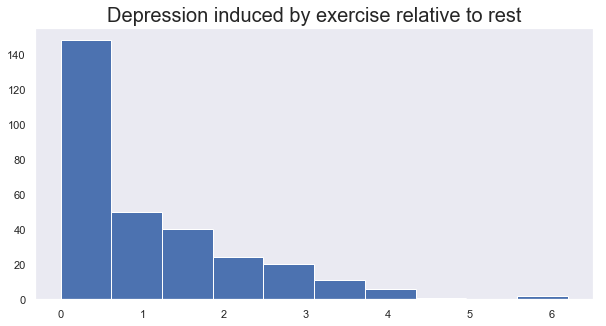

Output vs oldpeak]


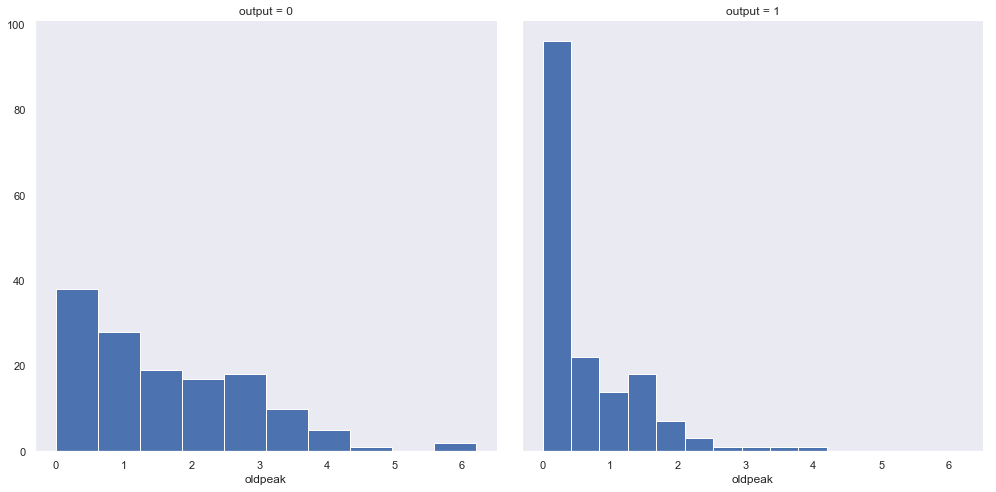

In [55]:
plt.figure(figsize=(10,5))
plt.title("Depression induced by exercise relative to rest",fontsize=20)
plt.hist(df['oldpeak'])
plt.show()
print("Output vs oldpeak]")
sns.FacetGrid(df,col='output',height=7).map(plt.hist,'oldpeak')

In [56]:
#Output vs Slope: 
 #   the slope of the peak exercise ST segment
  #  Value 1: upsloping
   # Value 2: flat
    #Value 3: down-sloping

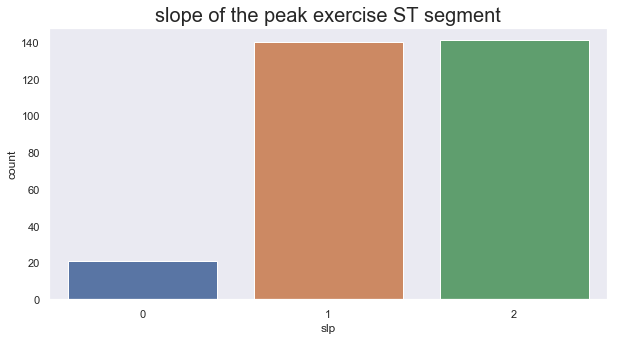

Output vs slp 


c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


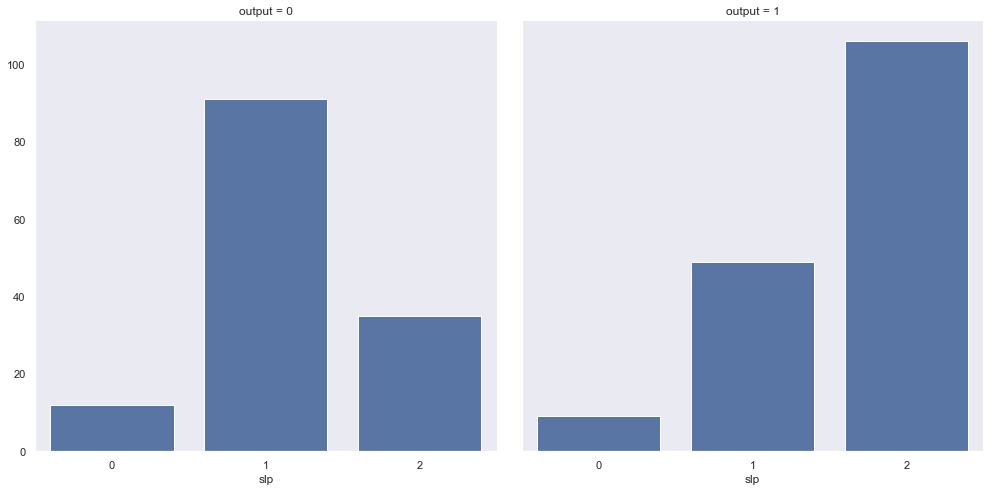

In [57]:
plt.figure(figsize=(10,5))
plt.title("slope of the peak exercise ST segment",fontsize=20)
sns.countplot(df['slp'])
plt.show()
print("Output vs slp ")
sns.FacetGrid(df,col='output',height=7).map(sns.countplot,'slp')

In [58]:
#lets check this out with ultivariate analysis

In [59]:
#Output vs Ca: number of major vessels (0-3) colored by fluoroscopy

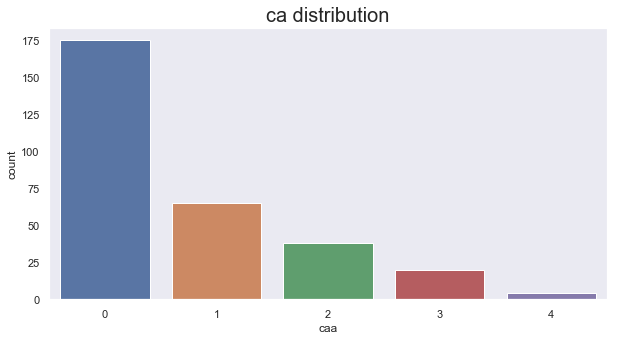

Output vs caa 


c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


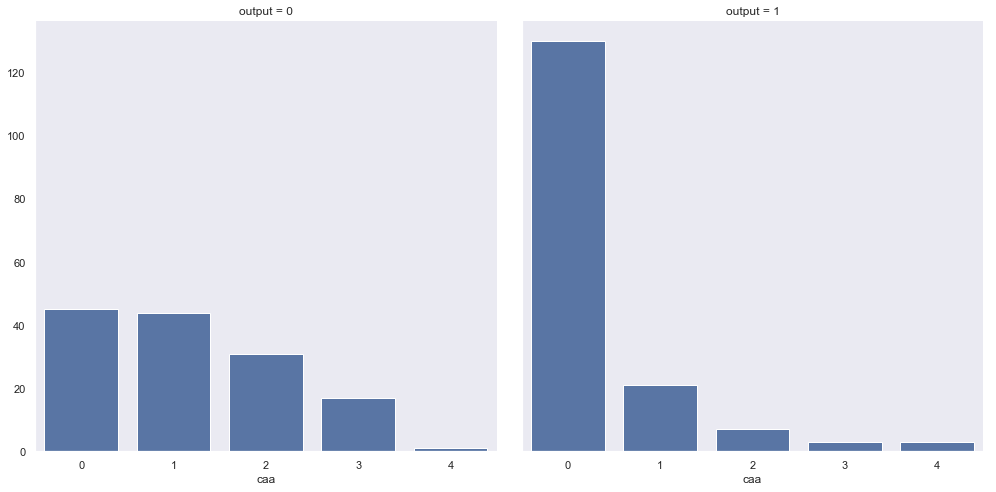

In [60]:
plt.figure(figsize=(10,5))
plt.title("ca distribution",fontsize=20)
sns.countplot(df['caa'])
plt.show()
print("Output vs caa ")
sns.FacetGrid(df,col='output',height=7).map(sns.countplot,'caa')

In [61]:
#Output vs Thal
#    3 = normal; 6 = fixed defect; 7 = reversible defect
#    thal - 2 = normal; 1 = fixed defect; 3 = reversable defect

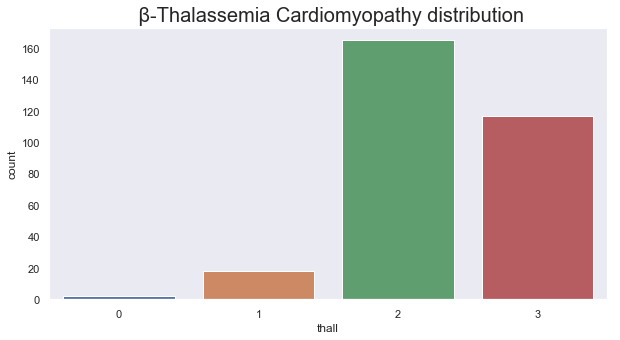

Output vs thall 


c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


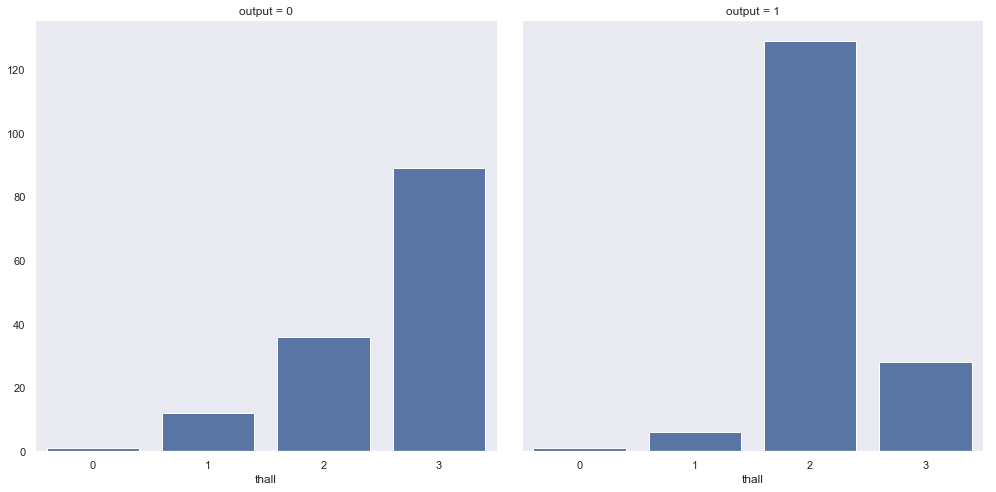

In [62]:
plt.figure(figsize=(10,5))
plt.title(" β-Thalassemia Cardiomyopathy distribution",fontsize=20)
sns.countplot(df['thall'])
plt.show()
print("Output vs thall ")
sns.FacetGrid(df,col='output',height=7).map(sns.countplot,'thall')

In [63]:
#Multivariate analysis

Text(0.5, 1.0, 'Gender v/s Thalassemia\n')

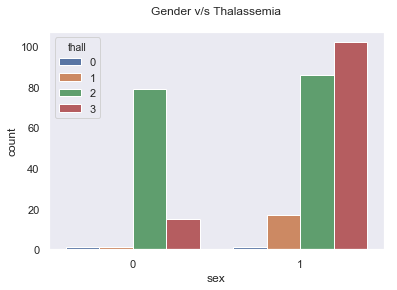

In [64]:
sns.countplot(data= df, x='sex',hue='thall')
plt.title('Gender v/s Thalassemia\n')

Text(0.5, 1.0, 'Slope v/s Target\n')

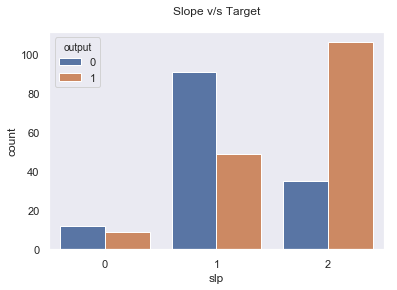

In [65]:
sns.countplot(data= df, x='slp',hue='output')
plt.title('Slope v/s Target\n')

Text(0.5, 1.0, 'exng v/s Thalassemia\n')

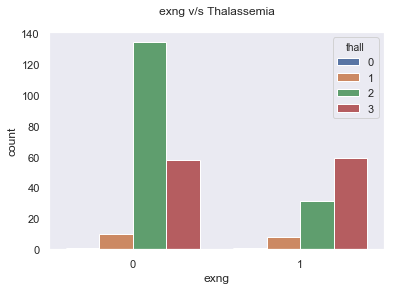

In [66]:
sns.countplot(data= df, x='exng',hue='thall')
plt.title('exng v/s Thalassemia\n')

In [ ]:
#Gender, Chest Pain Type and β-Thalassemia

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


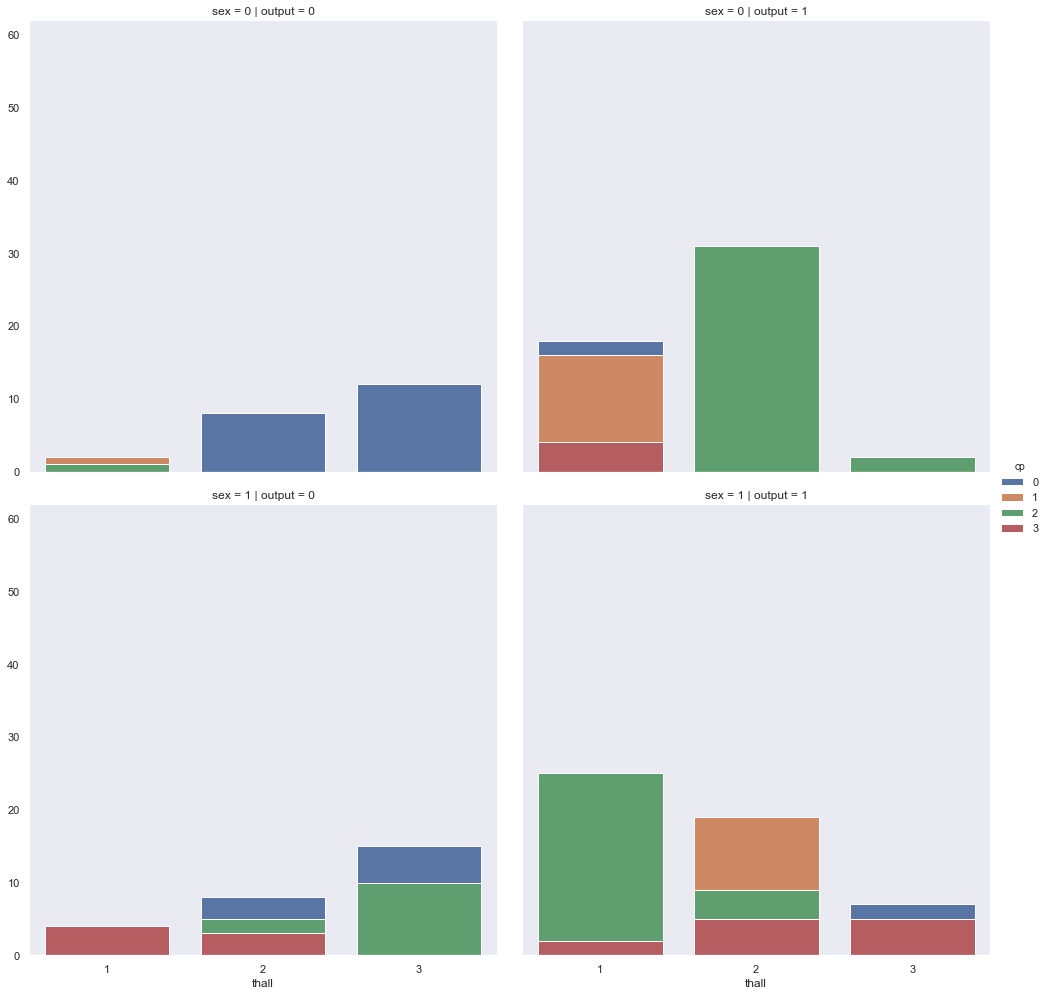

In [67]:
sns.FacetGrid(df,col='output',row='sex',hue='cp',height=7).map(sns.countplot,'thall').add_legend()

In [68]:
#Most female and male patients diagnosed with β-Thalassemia, or the reversible phenotype, and displaying signs of cardiac disease did not exhibit non-stress induced angina pain

In [69]:
#Gender, Chest Pain and Age

<Figure size 720x360 with 0 Axes>

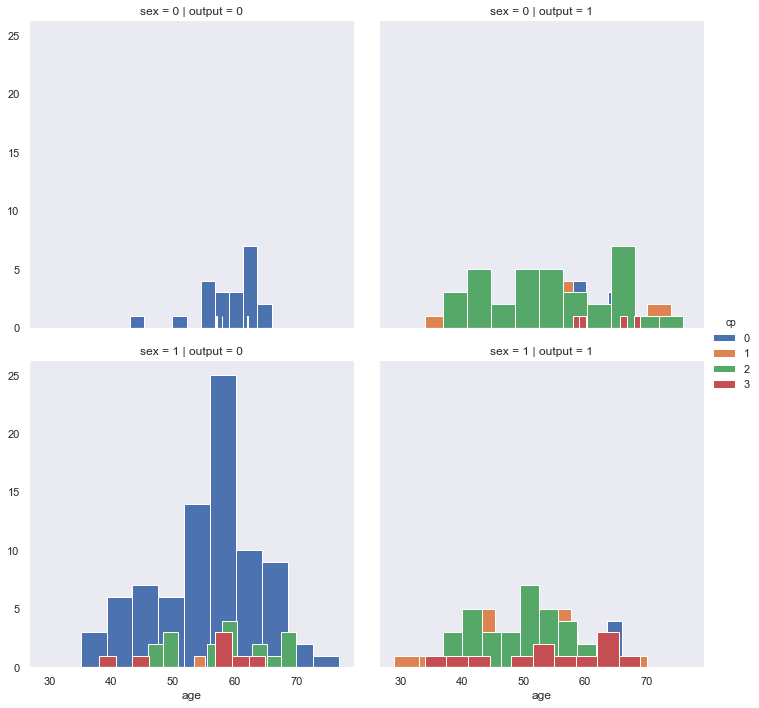

In [70]:
plt.figure(figsize=(10,5))
sns.FacetGrid(df,col='output',row='sex',hue='cp',height=5).map(plt.hist,'age').add_legend()

In [71]:
#Gender, Chest Pain Type and Exercise Induced Angina

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 720x360 with 0 Axes>

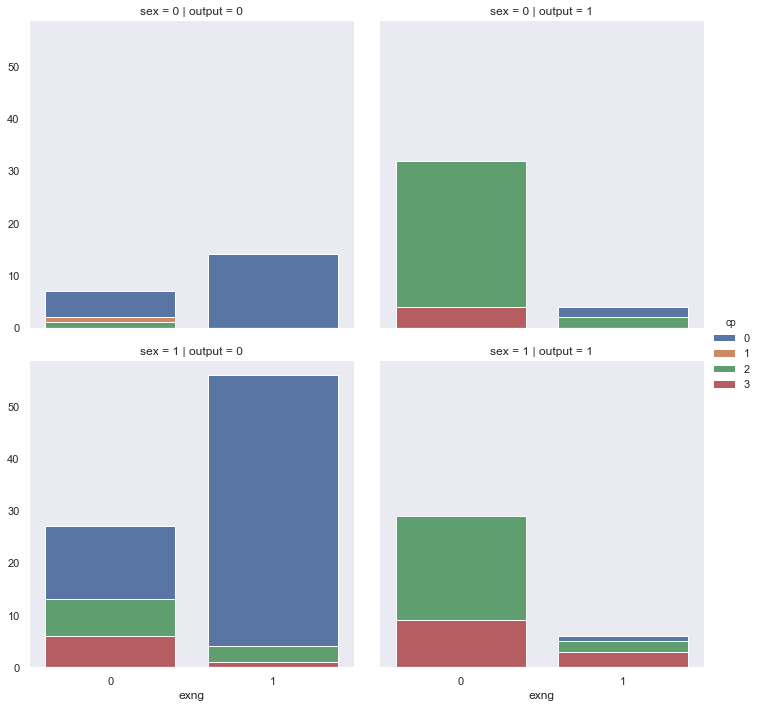

In [72]:
plt.figure(figsize=(10,5))
sns.FacetGrid(df,col='output',row='sex',hue='cp',height=5).map(sns.countplot,'exng').add_legend()

In [73]:
#Although the majority of males and females diagnosed with cardiac disease were asymptomatic for angina pain, they actually exhibit exercise induced angina pain . This added further support to the use of the exercise induced angina pain feature for the prediction of heart disease.

In [74]:
#Feature Engineering

In [75]:
#Outlier detection and treatment

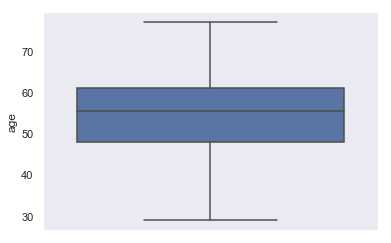

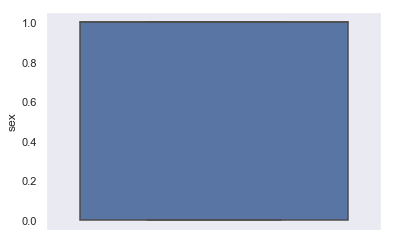

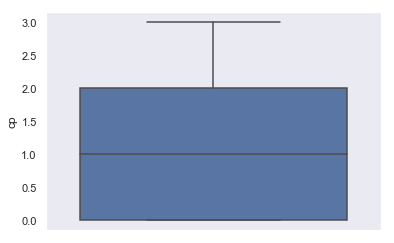

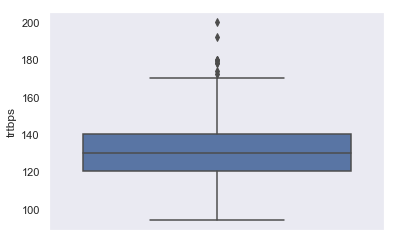

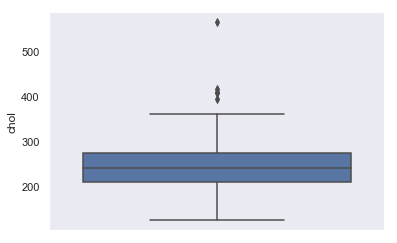

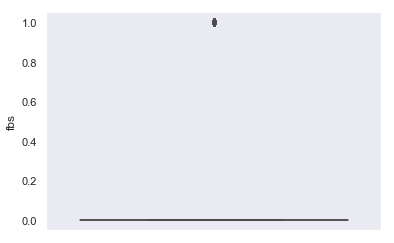

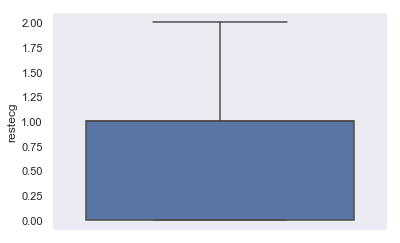

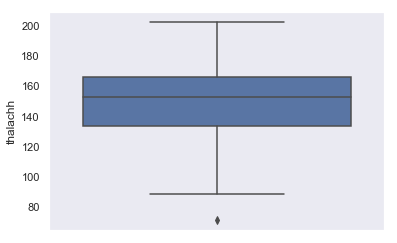

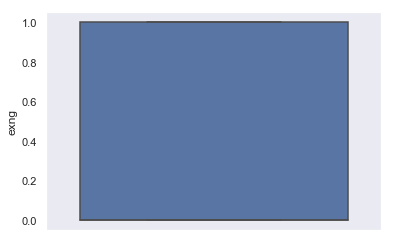

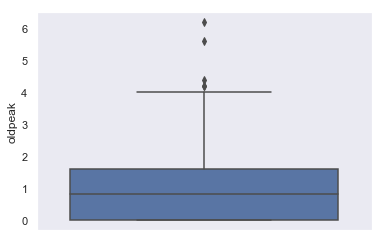

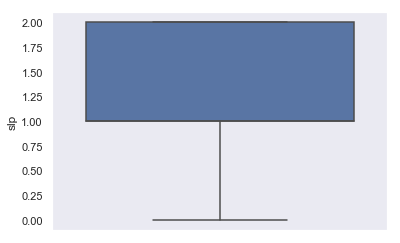

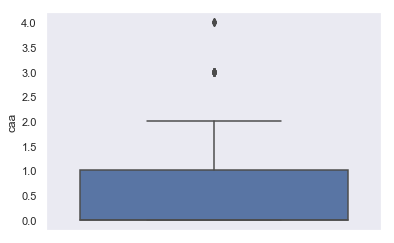

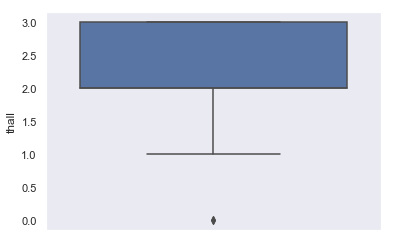

In [76]:
for i in range(0,13):
    sns.boxplot(y=df.iloc[:,i],data=df)
    plt.show()

In [77]:
#As you can see some have features have outliers .

In [78]:
#1. Inter-Quartile Range
#In IQR, the data points higher than the upper limit and lower than the lower limit are considered outliers.

#upper limit = Q3 + 1.5 * IQR
#lower limit = Q1 – 1.5 * IQR
#We find the IQR for all features using the code snippet,

In [79]:
 #Find the InterQuartile Range
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print('*********** InterQuartile Range ***********')
print(IQR)
# Remove the outliers using IQR
df1 = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
df1.shape       

*********** InterQuartile Range ***********
age         13.00
sex          1.00
cp           2.00
trtbps      20.00
chol        63.75
fbs          0.00
restecg      1.00
thalachh    32.75
exng         1.00
oldpeak      1.60
slp          1.00
caa          1.00
thall        1.00
output       1.00
dtype: float64


(228, 14)

In [80]:
#If a Z-score is greater than 3, it implies that the data point differs from the other data points and hence is treated as an outlier.

In [82]:
#Removing outliers using Z-score
z = np.abs(stats.zscore(df))
df2 = df[(z<3).all(axis=1)]
df2.shape

(287, 14)

In [83]:
#After using Z-score to detect and remove outliers, the number of records in the dataset is 287. 

#As the number of records available is higher after Z-score, we will proceed with ‘data3’

In [84]:
#After removing outliers from data, we will find the correlation between all the features.

#Two types of correlation will be used here.

#Pearson Correlation
#Spearman Correlation

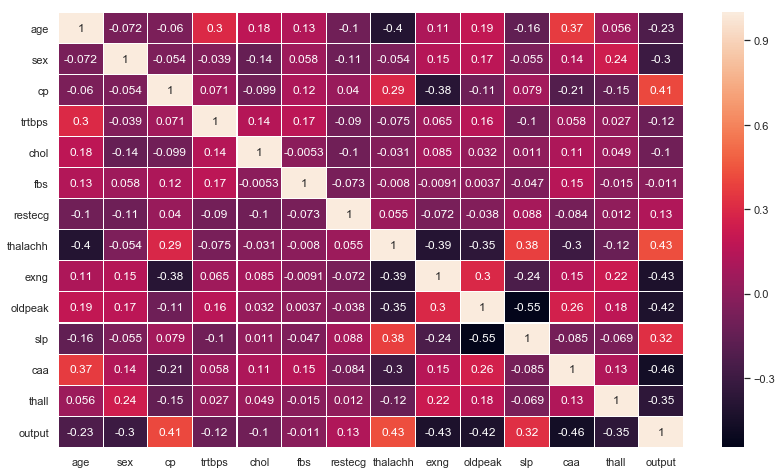

In [85]:
fig = plt.subplots(figsize=(14,8))
sns.heatmap(df2.corr(method="pearson"),annot= True,linewidth=0.1)

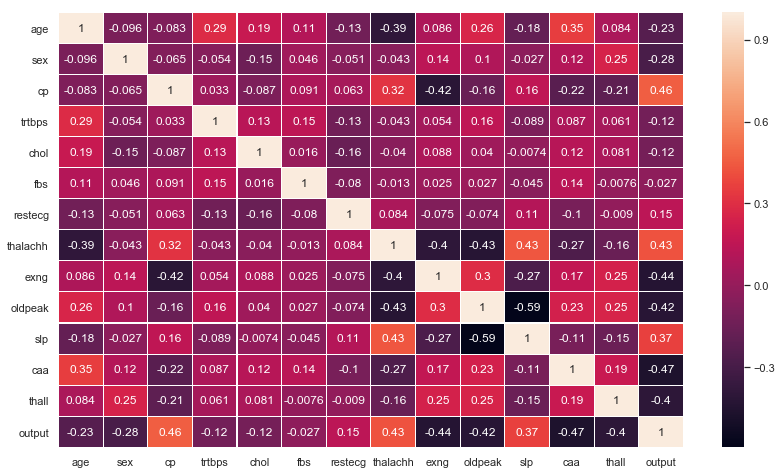

In [86]:
fig = plt.subplots(figsize=(14,8))
sns.heatmap(df.corr(method="spearman"),annot= True,linewidth=0.1)

In [87]:
x = df2.drop(["output",'restecg'], axis=1)
y = df2["output"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=0)


In [88]:
# Using Random forest classifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print("Accuracy of Random Forest Classifier :: ", metrics.accuracy_score(y_test, y_pred_rf))

Accuracy of Random Forest Classifier ::  0.896551724137931


c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [89]:
logReg = LogisticRegression(random_state=0, solver='liblinear')
logReg.fit(x_train, y_train)
#Check accuracy of Logistic Regression
y_pred_logReg = logReg.predict(x_test)
#Model Accuracy
print("Accuracy of logistic regression classifier :: " ,metrics.accuracy_score(y_test,y_pred_logReg))

Accuracy of logistic regression classifier ::  1.0


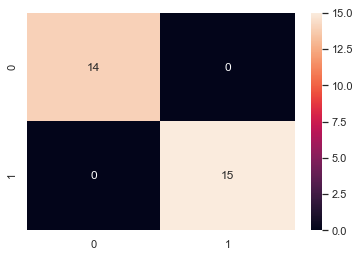

In [95]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_logReg)
sns.heatmap(cm,annot= True)

In [96]:
for n in range (1, 20, 2):
    knn = KNeighborsClassifier (n_neighbors = n)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    acc_knn = round(knn.score(x_train, y_train) * 100, 2)
    print("The accuracy with", n, "neihbors is:", acc_knn)
    
    y_pred

The accuracy with 1 neihbors is: 100.0
The accuracy with 3 neihbors is: 79.07
The accuracy with 5 neihbors is: 77.91
The accuracy with 7 neihbors is: 72.48
The accuracy with 9 neihbors is: 71.71
The accuracy with 11 neihbors is: 69.38
The accuracy with 13 neihbors is: 68.99
The accuracy with 15 neihbors is: 68.99
The accuracy with 17 neihbors is: 67.05
The accuracy with 19 neihbors is: 68.22


In [97]:
dc= DecisionTreeClassifier()
dc.fit(x_train,y_train)
preddc= dc.predict(x_test)
metrics.accuracy_score(y_test,preddc)

0.8620689655172413

In [98]:
print("now lets see the scores togher")

models = pd.DataFrame({
    "Model": ["Random Forest","Decision Tree"  ,"Logistic Regression","KNN"],
    "Score": [ metrics.accuracy_score(y_test, y_pred_rf)*100,metrics.accuracy_score(y_test,preddc)*100 , metrics.accuracy_score(y_test,y_pred_logReg)*100, acc_knn]
})

models.sort_values(by = "Score", ascending = False)

now lets see the scores togher


,Model,Score
2,Logistic Regression,100.000000
0,Random Forest,89.655172
1,Decision Tree,86.206897
3,KNN,68.220000
